In [1]:
%matplotlib widget

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# загрузка таблички
pass_link = 'https://www.dropbox.com/s/lyzcuxu1pdrw5qb/titanic_data.csv?dl=1'
data = pd.read_csv(pass_link) 
# скачиваем табличку по летальности
surv_link = 'https://www.dropbox.com/s/v35x9i6a1tc7emm/titanic_surv.csv?dl=1'
surv_data = pd.read_csv(surv_link)
# создаем колонку PassengerId из индексов в табличке surv_data
surv_data['PassengerId'] = surv_data.index
# соединяем таблички по колонке 'PassengerId'
data = data.merge(surv_data, on='PassengerId')

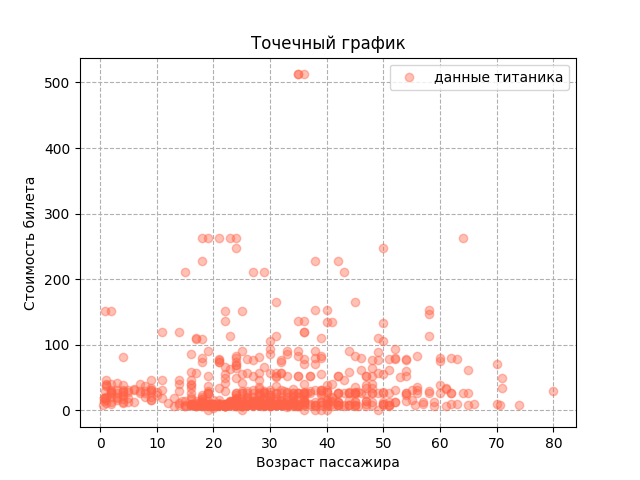

In [3]:
# точечный график
fig = plt.figure()
plt.scatter(data['Age'], data['Fare'], c='tomato', alpha=0.4, label='данные титаника', zorder=2, )
plt.title('Точечный график')
plt.ylabel('Стоимость билета')
plt.xlabel('Возраст пассажира')
plt.grid(ls='--', zorder=1)
plt.legend()

In [4]:
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


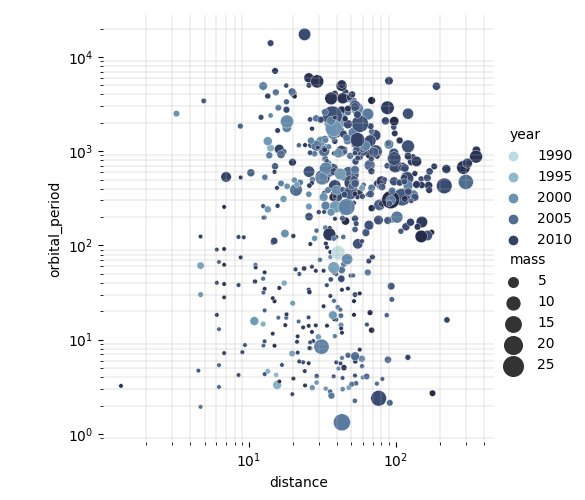

In [5]:
# загрузим датасет планет из библиотеки seaborn 
planets = sns.load_dataset("planets")

g = sns.relplot(
    data=planets, # .iloc[1030:]
    x="distance", y="orbital_period",
    hue="year", size="mass",
    palette=sns.cubehelix_palette(rot=-.2, as_cmap=True), 
    sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

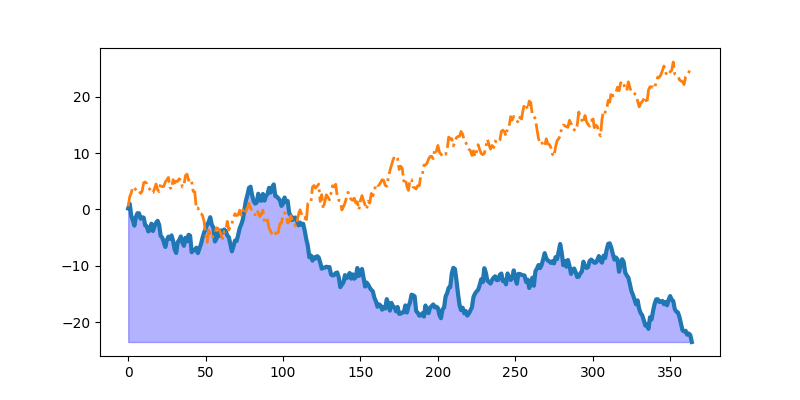

In [12]:
# линейный график
rs = np.random.RandomState(365)
values = rs.randn(365, 2).cumsum(axis=0)
t = np.arange(0, 365)

fig = plt.figure(figsize=(8, 4))
plt.plot(t, values[:,0], lw=3)
plt.plot(t, values[:,1], lw=2, ls='-.')
plt.fill_between(t, [min(values[:,0])]*len(t), values[:,0], color='blue', alpha=0.3)

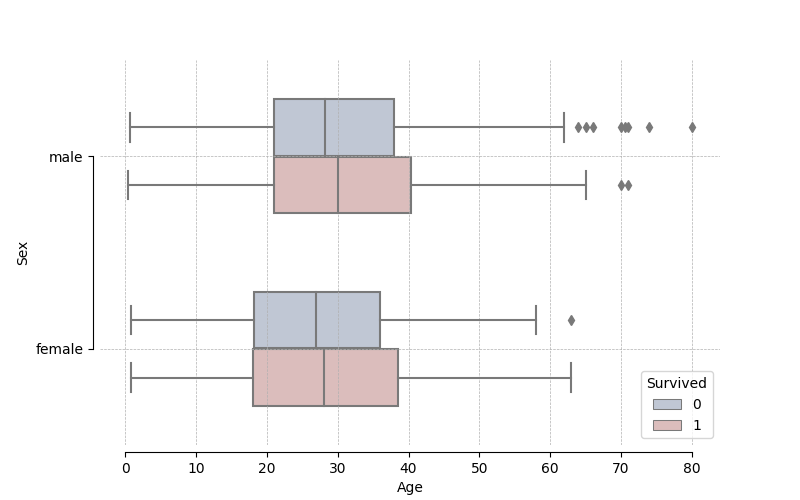

In [13]:
# график разброса  
# инициализация и построение 
fig = plt.figure(figsize=(8, 5))
sns.boxplot(
    data=data,
    x="Age", y="Sex", hue="Survived",
    width=.6, palette="vlag",
    zorder=3,
)
sns.despine(offset=5, trim=True)
plt.grid(ls='--', lw=0.5, zorder=1)

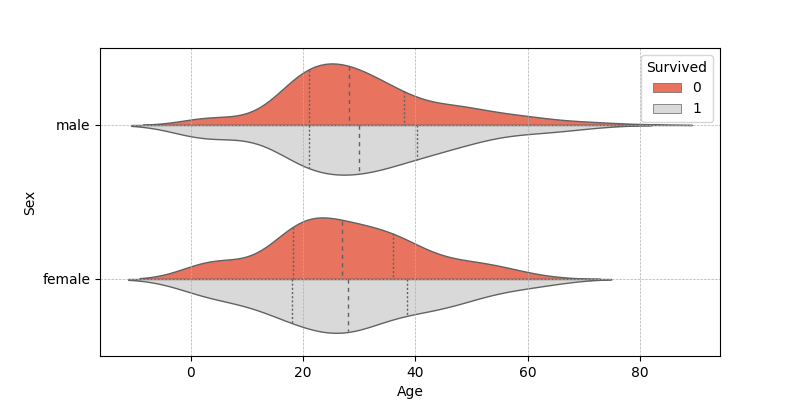

In [14]:
# график разброса  
# инициализация и построение stripplot
fig = plt.figure(figsize=(8, 4))
sns.violinplot(
    data=data,
    x="Age", y="Sex", hue="Survived",
    split=True, 
    inner="quart", 
    linewidth=1,
    linecolor='k',
    palette={0: "tomato", 1: ".85"}, 
    zorder=3
)
plt.grid(ls='--', lw=0.5, zorder=1)

In [6]:
# график разброса с контурным графиком
# просимулируем двумерное распределение гаусса
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

C:\Users\nicch\AppData\Local\Temp\ipykernel_15624\611184110.py:11: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


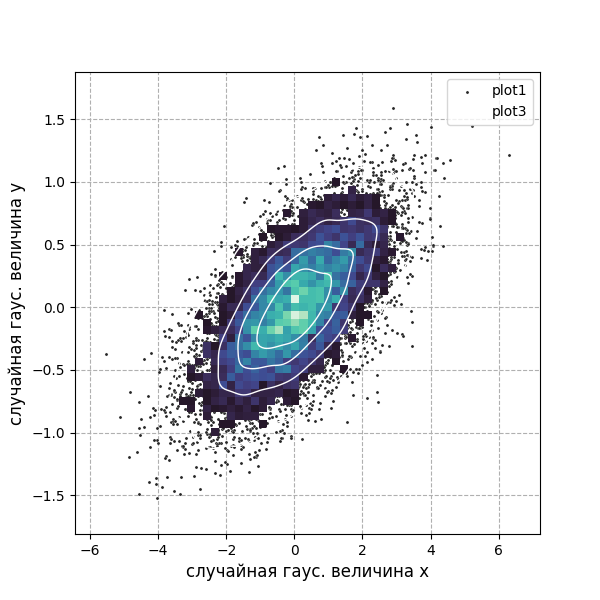

In [7]:
# создаем несколько графиков
f, ax = plt.subplots(figsize=(6, 6))

# комбинированная гистограмма и диаграмма рассеяния с контурами плотности
sns.scatterplot(x=x, y=y, s=5, color=".15", zorder=2, ax=ax, label='plot1')
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako", zorder=3, ax=ax, label='plot2')
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1, zorder=4, ax=ax, label='plot3')
ax.grid(ls='--', zorder=1)
ax.set_ylabel('случайная гаус. величина y', fontsize=12)
ax.set_xlabel('случайная гаус. величина x', fontsize=12)
ax.legend()

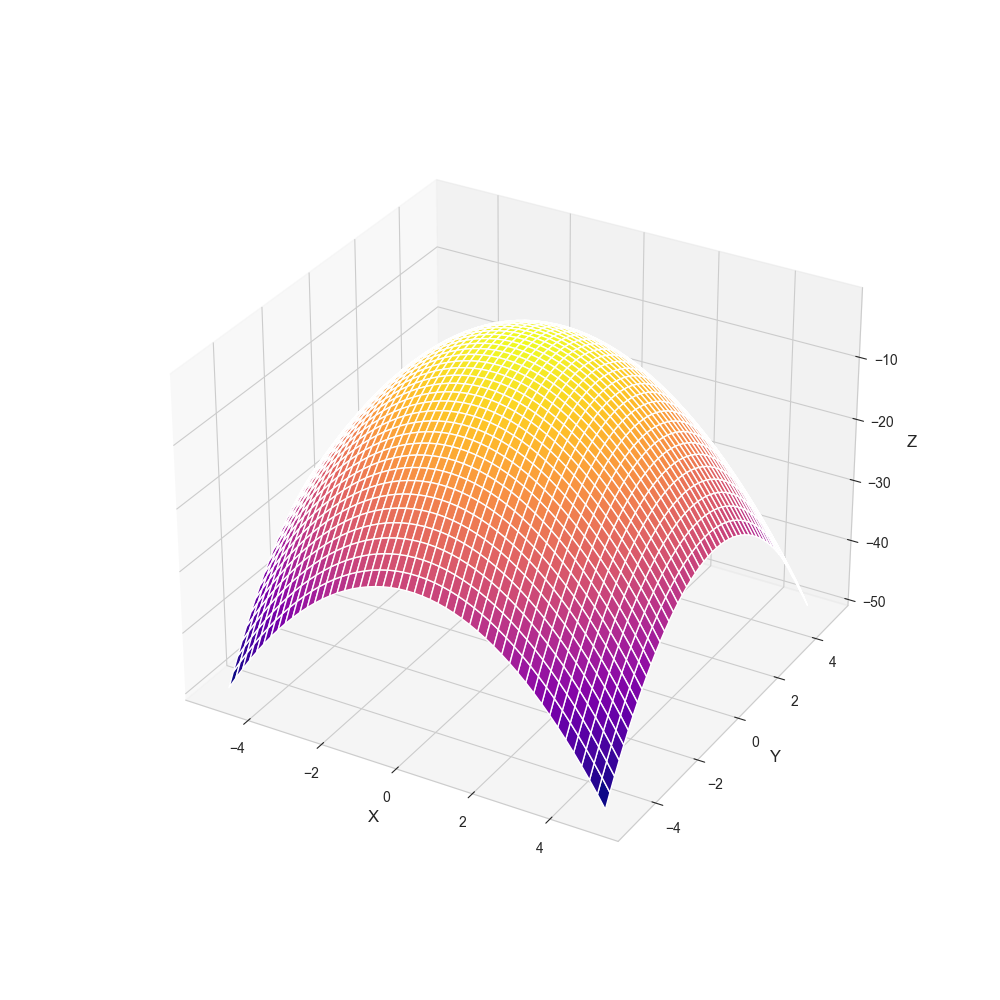

In [8]:
# график трехмерной поверхности
def foo(x, y):
    """функция трехмерной поверхности"""
    return -(x**2 + y**2)


n = 50
x = np.linspace(-5, 5, n)
y = np.linspace(-5, 5, n)

x_3d, y_3d = np.meshgrid(x, y)
z_3d = foo(x_3d, y_3d)

fig = plt.figure(figsize=(10, 10))
sns.set_style('whitegrid')
axes = plt.axes(projection='3d')
axes.plot_surface(x_3d, y_3d, z_3d, cmap='plasma')
axes.set_xlabel('X', fontsize=12)
axes.set_ylabel('Y', fontsize=12)
axes.set_zlabel('Z', fontsize=12)
plt.show()